In [11]:
# https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7

import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, titulo, alpha=0.8, resolution=0.02):

#definir un generador de marcadores y un mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

#representar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #representar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=alpha,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        plt.title(titulo)
    plt.show()




In [12]:
# cargamos las 4 combinaciones clásicas de las compuertas XOR y algunas más
training_data = np.array([[0,0],[0,1],[1,0],[1,1],[0.5, 0.5], [0.25,0.25], [0.75,0.75], [0,0.5], [0.5,0], [1, 0.5], [0.5,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
target_data = np.array([[0],[1],[1],[0], [0], [0], [0], [1], [1], [1], [1]], "float32")

model = Sequential()
model.add(Dense(16, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

model.fit(training_data, target_data, epochs=500)

# evaluamos el modelo
scores = model.evaluate(training_data, target_data)

print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print (model.predict(training_data).round())

Epoch 1/500
1/1 [==============================] - 0s 361ms/step - loss: 0.2626 - binary_accuracy: 0.4545
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.2620 - binary_accuracy: 0.3636
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2613 - binary_accuracy: 0.3636
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2607 - binary_accuracy: 0.3636
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2601 - binary_accuracy: 0.3636
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2595 - binary_accuracy: 0.3636
Epoch 7/500
1/1 [==============================] - 0s 6ms/step - loss: 0.2589 - binary_accuracy: 0.3636
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2583 - binary_accuracy: 0.3636
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2577 - binary_accuracy: 0.3636
Epoch 10/500
1/1 [==============================] - 0s 8ms/ste

In [13]:
np.unique(target_data)
print(target_data.shape)

(11, 1)


In [5]:
training_data

array([[0.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 1.  ],
       [0.5 , 0.5 ],
       [0.25, 0.25],
       [0.75, 0.75],
       [0.  , 0.5 ],
       [0.5 , 0.  ],
       [1.  , 0.5 ],
       [0.5 , 1.  ]], dtype=float32)

In [14]:
training_data[1,0]

0.0

704/704 [==============================] - 1s 760us/step


<ipython-input-11-df437acdc8da>:29: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


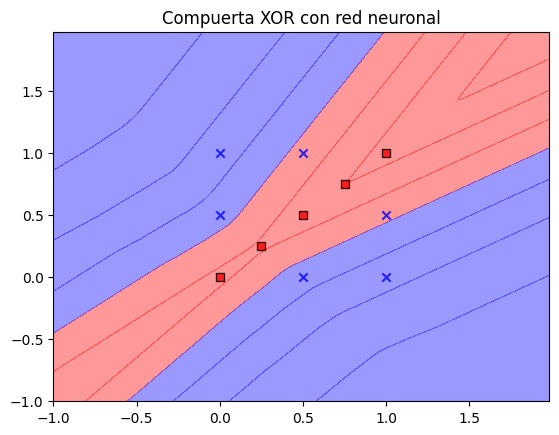

In [15]:
plot_decision_regions(training_data, target_data.ravel(), model, 'Compuerta XOR con red neuronal')

In [16]:
from keras.models import model_from_json

# serializar el modelo a JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serializar los pesos a HDF5
model.save_weights("model.h5")
print("Modelo Guardado!")

# mas tarde...

# cargar json y crear el modelo
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# cargar pesos al nuevo modelo
loaded_model.load_weights("model.h5")
print("Cargado modelo desde disco.")

# Compilar modelo cargado y listo para usar.
loaded_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])

Modelo Guardado!
Cargado modelo desde disco.


In [17]:
print (loaded_model.predict(training_data).round())

1/1 [==============================] - 0s 36ms/step
[[0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]]
